In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [365]:
#sleep 
#p not gettling sleep (assumes once a week awake sleep)
Andrew = (1/28)
Carolyn = (1/28)

#awake hours are between 1A-5A and awake is for 30 min at a time
Andrew = Andrew / 10
Carolyn = Carolyn / 10

#p = time both Andrew and Carolyn are up at the same time
pAwake = Andrew * Carolyn

In [366]:
N_Occurences = []
N_Days_Before_first = []

n = 100000

days_per_year = 365
years_together = 9
n_awake_periods = 10
#days in a year times years together time periods considered poor sleep times 
SleepSpace = days_per_year*years_together*n_awake_periods
for i in range(n):
    Nexperiment = np.random.binomial(1, pAwake, size=SleepSpace)
    occurences = np.sum(Nexperiment)
    N_Occurences.append(occurences)
    try:
        FirstDay = (Nexperiment.tolist().index(1)/n_awake_periods) / 365
    except ValueError: 
        FirstDay = 0
    N_Days_Before_first.append(FirstDay)

Probability for any one night Carolyn and Andrew wake up at the same time in the middle of the night is low p = 1.2755102040816324e-06
Average years from experiments before Carolyn and Andrew happen to be awake at the same time for the first time is 1.42 years.
Number of times we would have woken up over the course of relationship 6.35
Probability of being awake at same time never happening 0.65977
Probability of being awake at same time once 0.27371
Probability of being awake at same time twice 0.05714
Probabiliyt of being awake at same time more than twice 0.00938
AxesSubplot(0.125,0.11;0.775x0.77)


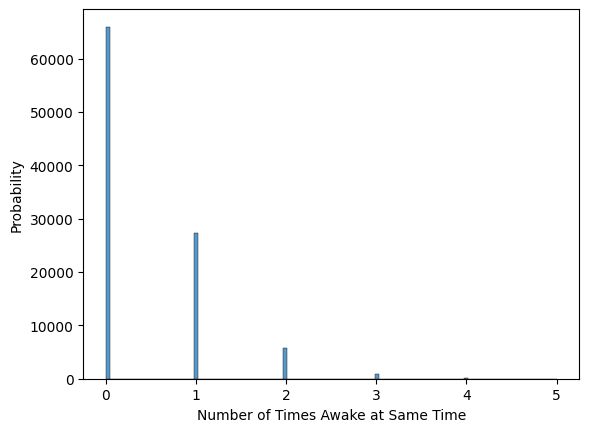

In [367]:
N_Occurences = np.array(N_Occurences)

p0 = np.count_nonzero(N_Occurences < 1) / N_Occurences.size
p1 =np.count_nonzero(N_Occurences == 1) / N_Occurences.size
p2 = np.count_nonzero(N_Occurences == 2) / N_Occurences.size
pMost = np.count_nonzero(N_Occurences > 2) / N_Occurences.size

print("Probability for any one night Carolyn and Andrew wake up at the same time in the middle of the night is low p =", pAwake/n_awake_periods)
print("Average years from experiments before Carolyn and Andrew happen to be awake at the same time for the first time is", np.mean(N_Days_Before_first).round(2), "years.")
print("Number of times we would have woken up over the course of relationship", (years_together/(np.mean(N_Days_Before_first))).round(2))
print("Probability of being awake at same time never happening", p0)
print("Probability of being awake at same time once", p1)
print("Probability of being awake at same time twice", p2)
print("Probabiliyt of being awake at same time more than twice", pMost)

hist = sns.histplot(N_Occurences)
hist.set(xlabel='Number of Times Awake at Same Time', ylabel='Probability')
print(hist)